<a href="https://colab.research.google.com/github/Ashwinks1995/hello/blob/master/Explore_zillow_data_sets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explore Zillow

## Ingest

In [0]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns; sns.set(color_codes=True)
from sklearn.cluster import KMeans
color = sns.color_palette()
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/noahgift/real_estate_ml/master/data/Zip_Zhvi_SingleFamilyResidence_2018.csv")


## EDA

In [0]:
df.describe()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
count,15508.000,15508.000,15508.000,14338.000,14338.000,14338.000,14338.000,14338.000,14338.000,14338.000,...,15508.000,15508.000,15508.000,15508.000,15508.000,15508.000,15508.000,15508.000,15508.000,15508.000
mean,80789.618,47683.566,7754.500,115889.866,116007.379,116123.051,116235.493,116358.920,116501.681,116689.315,...,279359.582,280672.685,282148.749,283446.447,284466.282,285500.200,286717.307,288029.320,289187.510,290106.635
std,31521.485,29008.034,4476.918,85115.825,85264.209,85413.118,85566.676,85744.243,85958.867,86230.630,...,361868.364,361360.576,363102.089,365301.815,366277.876,367095.613,366772.521,364624.171,361143.146,359132.687
min,58196.000,1001.000,1.000,11300.000,11500.000,11600.000,11800.000,11800.000,12000.000,12100.000,...,21700.000,21700.000,22100.000,22200.000,22000.000,21800.000,21700.000,21500.000,21600.000,21900.000
25%,67215.000,22199.000,3877.750,66700.000,66800.000,66925.000,67100.000,67200.000,67300.000,67500.000,...,128300.000,128800.000,129675.000,130300.000,131100.000,131900.000,132900.000,134000.000,135100.000,135600.000
50%,77886.500,45792.500,7754.500,96500.000,96700.000,96750.000,96900.000,96900.000,97000.000,97150.000,...,191100.000,192150.000,193400.000,194600.000,195700.000,196900.000,198100.000,199600.000,201100.000,202150.000
75%,90314.250,74010.250,11631.250,140500.000,140600.000,140600.000,140800.000,141000.000,141100.000,141300.000,...,310750.000,312300.000,314325.000,316100.000,317425.000,318325.000,319800.000,321200.000,322425.000,323900.000
max,753844.000,99901.000,15508.000,3676700.000,3704200.000,3729600.000,3754600.000,3781800.000,3813500.000,3849600.000,...,17724700.000,17408900.000,17450500.000,17722800.000,18006700.000,18273800.000,18331900.000,18131900.000,17594900.000,17119600.000


#### Clean Up DataFrame
Rename RegionName to ZipCode and Change Zip Code to String 

In [0]:
df.rename(columns={"RegionName":"ZipCode"}, inplace=True)
df["ZipCode"]=df["ZipCode"].map(lambda x: "{:.0f}".format(x))
df["RegionID"]=df["RegionID"].map(lambda x: "{:.0f}".format(x))
df.head()

,RegionID,ZipCode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
0,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,1,334200.000,335400.000,336500.000,...,1037400,1038700,1041500,1042800,1042900,1044400,1047800,1049700,1048300,1047900
1,91982,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,2,210400.000,212200.000,212200.000,...,330400,332700,334500,335900,337000,338300,338400,336900,336000,336500
2,84616,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,3,498100.000,500900.000,503100.000,...,1317900,1321100,1325300,1323800,1321200,1320700,1319500,1318800,1319700,1323300
3,93144,79936,El Paso,TX,El Paso,El Paso County,4,77300.000,77300.000,77300.000,...,120800,121300,122200,123000,123600,124500,125600,126300,126800,127400
4,91940,77449,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,5,95400.000,95600.000,95800.000,...,175500,176400,176900,176900,177300,178000,178500,179300,180200,180700


In [0]:
median_prices = df.median()
#sf_prices = df["City"] == "San Francisco".median()


In [0]:
df.isna().values.any()
df = df = df.dropna()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


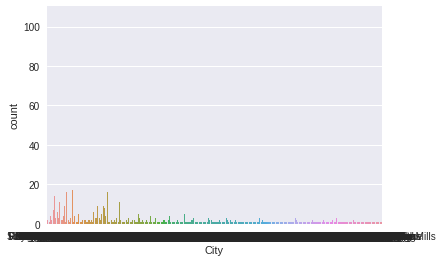

In [0]:


sns.countplot( x = "City",data = df)

In [0]:
abc_transpose.index = pd.to_datetime(abc_transpose.index)
abc_transpose.index


DatetimeIndex(['1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01',
               '1996-08-01', '1996-09-01', '1996-10-01', '1996-11-01',
               '1996-12-01', '1997-01-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', length=273, freq=None)

In [0]:
data = []
city = df.City
df['City'].value_counts()
abc = df.groupby('City').mean()
#abc = 
abc = abc.drop(['SizeRank'], axis =1)
abc_transpose = abc.transpose()
test = abc_transpose.loc[:,['Abbeville','San Francisco', 'New York', 'Seattle', 'Dallas', 'Austin']]


In [0]:
y = test['San Francisco']
y[:'2007']
y.tail(5)

2018-08   2204926.316
2018-09   2208315.789
2018-10   2214663.158
2018-11   2211621.053
2018-12   2209568.421
Name: San Francisco, dtype: float64

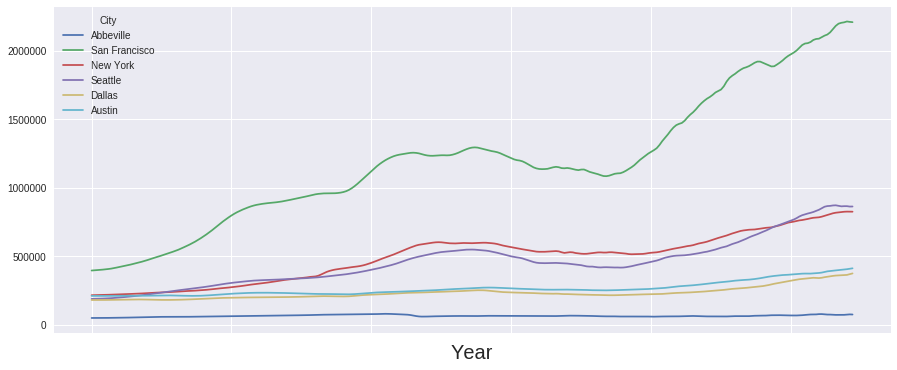

In [0]:


test.plot(figsize=(15, 6))
plt.xlabel('Year', fontsize=20);
plt.show()


In [0]:
test.index = pd.to_datetime(test.index)
test.index

DatetimeIndex(['1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01',
               '1996-08-01', '1996-09-01', '1996-10-01', '1996-11-01',
               '1996-12-01', '1997-01-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', length=273, freq=None)

In [0]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8

test.index = pd.to_datetime(abc_transpose.index)
abc_transpose.index

DatetimeIndex(['1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01',
               '1996-08-01', '1996-09-01', '1996-10-01', '1996-11-01',
               '1996-12-01', '1997-01-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', length=273, freq=None)

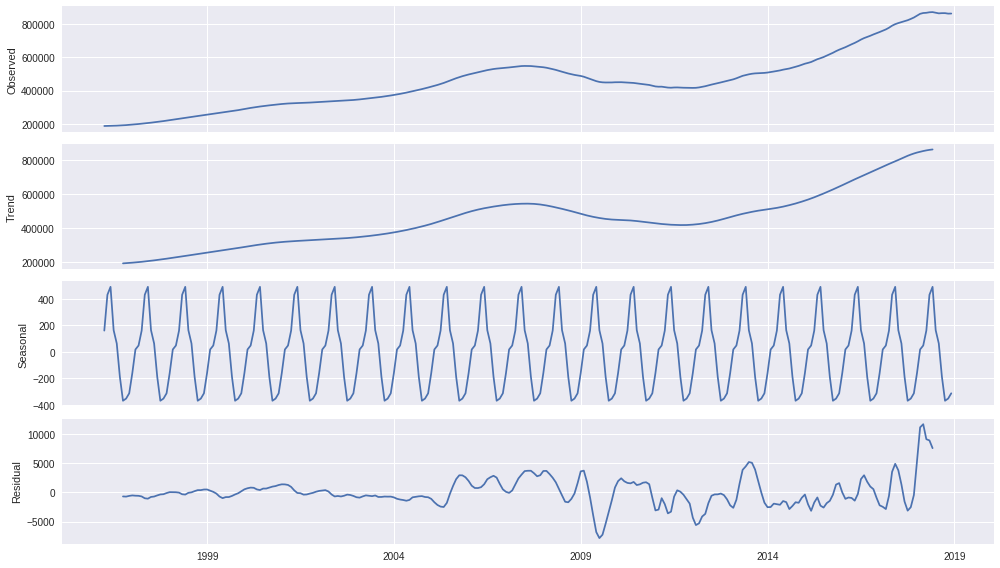

In [0]:
#decomposition = sm.tsa.seasonal_decompose(y, model='additive')
t = sm.tsa.seasonal_decompose(test.Seattle)
fig = t.plot()
plt.show()

##Modeling 


In [0]:
import itertools 
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))


Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [0]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:7896.249329144301
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:6521.194852224796
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:6703.002331470938
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:6640.152778978814
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:6349.770980843233
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:8719.733113432274
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:8196.944972860767
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:7790.243121242092
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:6932.29421968578
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:850161.0565796108
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:8433.036208634374
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:8268.323636700827
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:6323.012134434994
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:8526.395909900042
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:5503.149643854093
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:5244.0470845361215
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:5479.172272494029
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:5459.692081930101
ARIMA(0, 1

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:5289.275589941884
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:5437.770522312743
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:5441.694627771689
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:5265.062766323157


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:5309.014426400846
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:5454.528562347763
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:5208.693663409669
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:5596.81222887917


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:7406.173276868538
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:5239.751142263285
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:5210.662023402027
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:5115.367430758675
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:6457.809980150687
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:5170.377381886962
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:4954.492579484746
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:5118.224315687535
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:4864.499471620798
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:4954.817758414292
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:4956.130931217751
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:4840.4028071193225
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:4841.95989084748
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:5122.214654800946
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:4836.1887162537005
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:5078.280554865662
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:4757.222294531699
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:4853.9691036051345
ARIMA(1,

In [0]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                      San Francisco   No. Observations:                  273
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -2370.054
Date:                            Thu, 31 Jan 2019   AIC                           4750.108
Time:                                    00:31:07   BIC                           4768.155
Sample:                                04-01-1996   HQIC                          4757.353
                                     - 12-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7938      0.036     21.804      0.000       0.722       0.865
ma.L1          0.7432      0.035   

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


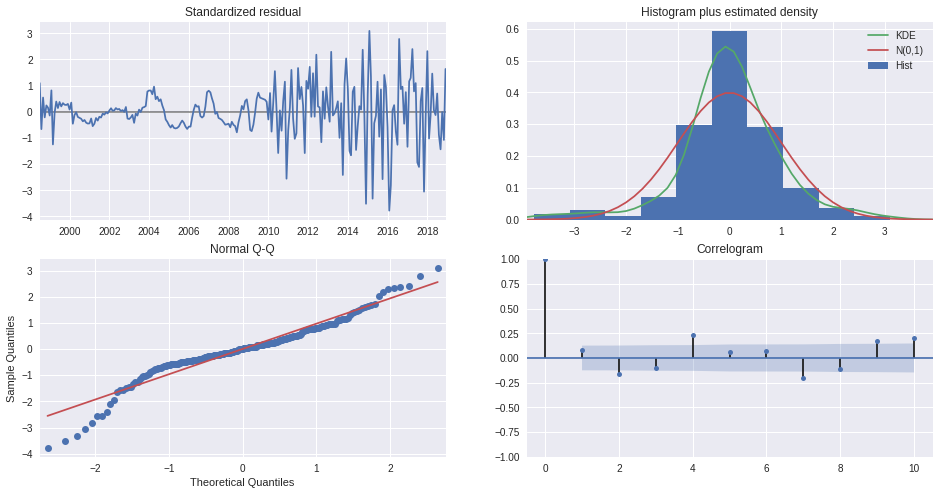

In [0]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

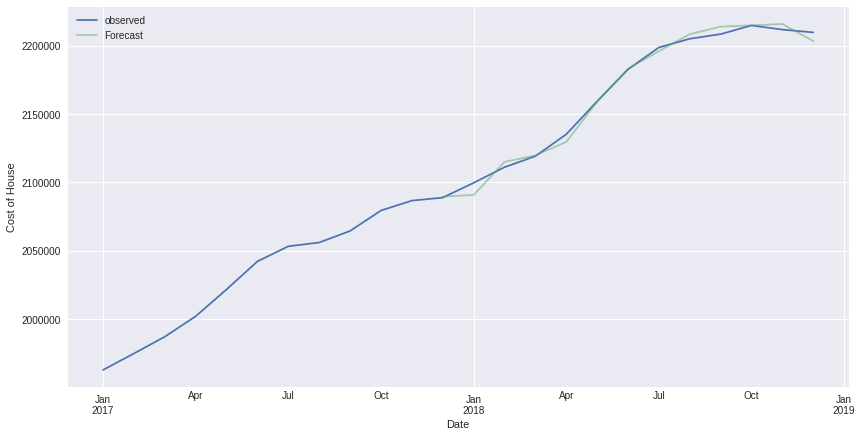

In [0]:
pred = results.get_prediction(start=pd.to_datetime('2017-12-01'), dynamic=False)
#pred_ci = pred.conf_int()

ax = y['2017':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.5, figsize=(14, 7))

#ax.fill_between(pred_ci.index,
#                pred_ci.iloc[:, 0],
#                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Cost of House')
plt.legend()

plt.show()

In [0]:
((y_forecasted - y_truth)**2).mean()

17728097.471408203

In [0]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]

mse = ((y_forecasted - y_truth) ** 2).mean()
#print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2))
round(mse,2)

17728097.47

In [0]:
y_truth, y_forecasted

(2017-01-01   1963147.368
 2017-02-01   1975136.842
 2017-03-01   1987394.737
 2017-04-01   2002326.316
 2017-05-01   2021931.579
 2017-06-01   2042415.789
 2017-07-01   2053400.000
 2017-08-01   2056173.684
 2017-09-01   2064600.000
 2017-10-01   2079531.579
 2017-11-01   2086742.105
 2017-12-01   2088942.105
 2018-01-01   2099726.316
 2018-02-01   2111131.579
 2018-03-01   2119200.000
 2018-04-01   2135163.158
 2018-05-01   2159247.368
 2018-06-01   2182557.895
 2018-07-01   2198584.211
 2018-08-01   2204926.316
 2018-09-01   2208315.789
 2018-10-01   2214663.158
 2018-11-01   2211621.053
 2018-12-01   2209568.421
 Name: San Francisco, dtype: float64, 2017-12-01   2097416.699
 2018-01-01   2090389.592
 2018-02-01   2108121.694
 2018-03-01   2121723.031
 2018-04-01   2128095.355
 2018-05-01   2153977.248
 2018-06-01   2182893.169
 2018-07-01   2197578.798
 2018-08-01   2208716.995
 2018-09-01   2217116.356
 2018-10-01   2217591.865
 2018-11-01   2216139.475
 2018-12-01   2206458.856
 

In [0]:
abc_transpose.head(5)
sf = abc_transpose.loc[: , "San Francisco"]
sf


In [0]:
abc_

In [0]:
df.groupby('City').mean()



*   Create a time series forecast
*   Find a second model using traditional machine learning (can also find 3rd party data)



In [0]:
#simple time series forecast
df_transposed = df.transpose()
df_transposed.head(10)

In [0]:
abc.head()

In [0]:
abc_transpose.head()

City,Abbeville,Aberdeen,Abilene,Abingdon,Abington,Abita Springs,Abrams,Absecon,Acampo,Accokeek,...,Zelienople,Zephyrhills,Zillah,Zimmerman,Zion,Zionsville,Zionville,Zumbro Falls,Zumbrota,Zuni
1996-04-01,47900.000,85575.000,63440.000,73575.000,144780.000,72000.000,109000.000,105500.000,182000.000,206800.000,...,79800.000,68133.333,98300.000,89600.000,108700.000,252600.000,68600.000,103500.000,88500.000,80200.000
1996-05-01,47900.000,85675.000,63400.000,73725.000,144640.000,72300.000,109200.000,105700.000,181400.000,206400.000,...,80300.000,68266.667,98800.000,87800.000,109200.000,255300.000,68700.000,103900.000,88300.000,80500.000
1996-06-01,48000.000,85800.000,63360.000,73850.000,144460.000,72600.000,109500.000,105800.000,180600.000,205700.000,...,80800.000,68400.000,99200.000,86200.000,109400.000,258600.000,68800.000,104200.000,88000.000,80800.000
1996-07-01,48100.000,85900.000,63340.000,74000.000,144260.000,72900.000,109600.000,106000.000,179800.000,204600.000,...,81300.000,68500.000,99500.000,84700.000,109300.000,262400.000,68900.000,104400.000,87700.000,81100.000
1996-08-01,48200.000,86050.000,63380.000,74175.000,144120.000,73200.000,109700.000,106200.000,179000.000,203500.000,...,81800.000,68600.000,99800.000,83500.000,109100.000,266400.000,69000.000,104600.000,87400.000,81400.000


In [0]:
target = ["San Francisco"]
features = ["Abbeville","Seattle", "Dallas"]
y = abc_transpose[target]
x = abc_transpose[features]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=42)
model = sm.OLS(y ,x)
results = model.fit() 
results.summary()

results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.994     
Dependent Variable: San Francisco    AIC:                7067.4676 
Date:               2019-01-31 00:31 BIC:                7078.2960 
No. Observations:   273              Log-Likelihood:     -3530.7   
Df Model:           3                F-statistic:        1.462e+04 
Df Residuals:       270              Prob (F-statistic): 1.98e-298 
R-squared:          0.994            Scale:              1.0136e+10
---------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
---------------------------------------------------------------------
Abbeville    4.4739     0.8532    5.2437   0.0000    2.7941    6.1536
Seattle      3.2996     0.1069   30.8693   0.0000    3.0892    3.5101
Dallas      -2.5756     0.4156   -6.1970   0.0000   -3.3939   -1.7574
-------------------------------------------------------------------
Omnibus:              31.742        Durbin-Watson:           0.009 
Prob(Omnibus):        0.000         Jarque-Bera (JB):        41.593
Skew:                 0.799         Prob(JB):                0.000 
Kurtosis:             4.051         Condition No.:           84    
===================================================================

"""

In [0]:
import sklearn.linear_model
from sklearn import linear_model

In [0]:
from sklearn.linear_model import LinearRegression 

lm = linear_model.LinearRegression()
model = lm.fit(y_train, X_train)
yy = model.predict(y_test)
model.score(y_test,X_test)

0.9410982827075666

In [0]:
#y_test.reset_index(drop=True, inplace=True)
#yy.reset_index(drop=True, inplace=True)


yy.max()

814068.7471888885

##Conclusion: 



Both the models provided pretty accurate results. 

* The preference of one over the other id determined by the type of data available and the usecasse.

* If growth in San Francisco is to be examined then ARIMA is prefered 

* If the growth of other cities has to be compared to  San Francisco then regression is preferred. 



